In [39]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer



In [40]:
import pandas as pd
import numpy as np
df = pd.DataFrame(pd.read_excel("chatgpt1-2.xlsx"))
df

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:34+00:00,1617156270871689984,ChatGPTã§éŠã¶ã®å¿˜ã‚Œã¦ãŸï¼ï¼\næ›¸é¡žä...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,NaN,NaN,1,0,5,0,1617156270871689984,ja,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0
1,2023-01-22 13:44:39+00:00,1617156291046129920,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,1,0,5,0,1617148639993799936,en,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,"[User(username='AlexandrovnaIng', id=282705900...",[],0
2,2023-01-22 13:44:44+00:00,1617156308926340096,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1617156308926340096,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
3,2023-01-22 13:44:49+00:00,1617156332297250048,Bow down to chatGPT ðŸ«¡..... https://t.co/ENT...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0,0,2,0,1617156332297250048,en,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/agadmator/status/161715501...,NaN,[],0
4,2023-01-22 13:44:52+00:00,1617156345064570112,"Profilinde vatan, TÃ¼rkiye falan yazan bireyle...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,NaN,NaN,0,0,4,0,1617156345064570112,tr,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,2023-01-24 06:57:56+00:00,1617778712082089984,"#ChatGPT ist ein #Chatbot, der durch kÃ¼nstlic...",HorstKrieger,https://twitter.com/HorstKrieger/status/161777...,https://twitter.com/HorstKrieger,"['https://lnkd.in/dzHbz5-z', 'https://lnkd.in/...","['https://t.co/qxUJZinuNO', 'https://t.co/lFZD...",0,0,0,0,1617778712082089984,de,"<a href=""http://www.linkedin.com/"" rel=""nofoll...",NaN,NaN,NaN,"['#ChatGPT', '#Chatbot,', '#KI', '#AI', '#Dial...",6
49997,2023-01-24 06:57:59+00:00,1617778726393240064,@r8r Ich hab mal die AI dazu befragt (ChatGPT)...,werpu,https://twitter.com/werpu/status/1617778726393...,https://twitter.com/werpu,NaN,NaN,0,0,0,0,1617774521586700032,de,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,"[User(username='r8r', id=15451529, displayname...",[],0
49998,2023-01-24 06:58:00+00:00,1617778728481989888,5 minuti di #chatGPT e ho capito che apprende ...,marcopiccinini,https://twitter.com/marcopiccinini/status/1617...,https://twitter.com/marcopiccinini,NaN,NaN,0,0,0,0,1617778728481989888,it,"<a href=""http://twitter.com/download/iphone"" r...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,['#chatGPT'],1
49999,2023-01-24 06:58:01+00:00,1617778731678040064,Portland Shop Uses ChatGPT To Tell Family Stor...,EuniceNyandat,https://twitter.com/EuniceNyandat/status/16177...,https://twitter.com/EuniceNyandat,['https://drumup.io/s/DkswB6'],['https://t.co/rzGvr6yTOc'],0,0,0,0,1617778731678040064,en,"<a href=""https://drumup.io"" rel=""nofollow"">dru...",NaN,NaN,NaN,[],0


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Datetime        50001 non-null  object
 1   Tweet Id        50001 non-null  int64 
 2   Text            50001 non-null  object
 3   Username        50001 non-null  object
 4   Permalink       50001 non-null  object
 5   User            50001 non-null  object
 6   Outlinks        19942 non-null  object
 7   CountLinks      19942 non-null  object
 8   ReplyCount      50001 non-null  int64 
 9   RetweetCount    50001 non-null  int64 
 10  LikeCount       50001 non-null  int64 
 11  QuoteCount      50001 non-null  int64 
 12  ConversationId  50001 non-null  int64 
 13  Language        50001 non-null  object
 14  Source          50001 non-null  object
 15  Media           9502 non-null   object
 16  QuotedTweet     3563 non-null   object
 17  MentionedUsers  17169 non-null  object
 18  hashta

In [67]:
df.shape

(44, 19)

In [68]:
df.columns

Index(['Datetime', 'Tweet Id', 'Text', 'Username', 'Permalink', 'User',
       'Outlinks', 'CountLinks', 'ReplyCount', 'RetweetCount', 'LikeCount',
       'QuoteCount', 'ConversationId', 'Language', 'Source', 'Media',
       'QuotedTweet', 'hashtag', 'hastag_counts'],
      dtype='object')

In [69]:
df.isnull().sum()

Datetime          0
Tweet Id          0
Text              0
Username          0
Permalink         0
User              0
Outlinks          0
CountLinks        0
ReplyCount        0
RetweetCount      0
LikeCount         0
QuoteCount        0
ConversationId    0
Language          0
Source            0
Media             0
QuotedTweet       0
hashtag           0
hastag_counts     0
dtype: int64

In [70]:
df.describe()

,Tweet Id,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,hastag_counts
count,4.400000e+01,44.000000,44.000000,44.000000,44.000000,4.400000e+01,44.000000
mean,1.617471e+18,0.659091,1.045455,6.545455,0.113636,1.617466e+18,1.954545
std,1.793647e+14,1.218905,2.649744,13.069500,0.442819,1.768779e+14,3.079977
min,1.617156e+18,0.000000,0.000000,0.000000,0.000000,1.617156e+18,0.000000
25%,1.617321e+18,0.000000,0.000000,0.000000,0.000000,1.617321e+18,0.000000
50%,1.617528e+18,0.000000,0.000000,1.000000,0.000000,1.617522e+18,1.000000
75%,1.617600e+18,1.000000,0.250000,5.250000,0.000000,1.617591e+18,2.250000
max,1.617756e+18,6.000000,12.000000,57.000000,2.000000,1.617756e+18,15.000000


In [71]:
df.nunique()

Datetime          44
Tweet Id          44
Text              44
Username          40
Permalink         44
User              40
Outlinks          44
CountLinks        44
ReplyCount         6
RetweetCount       6
LikeCount         16
QuoteCount         3
ConversationId    44
Language           6
Source             7
Media             44
QuotedTweet       44
hashtag           21
hastag_counts     10
dtype: int64

In [72]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        try:
            itm = data[col].value_counts().index[0]
            val = data[col].value_counts().values[0]
            items.append(itm)
            vals.append(val)
        except Exception as ex:
            print(ex)
            items.append(0)
            vals.append(0)
            continue
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [73]:
most_frequent_values(df)

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,hashtag,hastag_counts
Total,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44
Most frequent item,2023-01-22 13:44:44+00:00,1617156308926340096,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ChatGPT2049,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ChatGPT2049,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,0,0,1617156308926340096,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,[],0
Frequence,1,1,1,4,1,4,1,1,28,33,16,41,1,33,19,1,1,20,20
Percent from total,2.273,2.273,2.273,9.091,2.273,9.091,2.273,2.273,63.636,75.0,36.364,93.182,2.273,75.0,43.182,2.273,2.273,45.455,45.455


In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df['Username'].unique()

array(['ciffi', 'Why_So_Trill', 'gregors_mac', 'yova', 'ConnectingODots',
       'yOyO38', 'DataChaz', 'muuficom', 'mjcavaretta', 'Sammy_Swagner',
       'lain_bof', 'pisingh_', 'MrCoachK15', 'AgirlwhosNO_ONE',
       'ChatGPT2049', 'JensHerforth', 'AldoLema_uy', 'al91201',
       'connolly_s', 'AadaFinance', 'artquint1', 'ICODrops', 'TostiOk',
       'films7', 'yeasalem', 'LloydMathias', 'GolfSpyMPR', 'NorFalse',
       'buxdabomb', 'Makrea', 'yesthatkarim', 'Kempton', 'hcingh',
       'rorotrader', 'FigliContesi_21', 'digitalhk678', 'gracielagon',
       'marekkowal', 'AlexFrapart', 'kie_v7'], dtype=object)

In [76]:
df['Username'].value_counts()

ChatGPT2049        4
yova               2
ciffi              1
yesthatkarim       1
films7             1
yeasalem           1
LloydMathias       1
GolfSpyMPR         1
NorFalse           1
buxdabomb          1
Makrea             1
Kempton            1
ICODrops           1
hcingh             1
rorotrader         1
FigliContesi_21    1
digitalhk678       1
gracielagon        1
marekkowal         1
AlexFrapart        1
TostiOk            1
artquint1          1
Why_So_Trill       1
AadaFinance        1
gregors_mac        1
ConnectingODots    1
yOyO38             1
DataChaz           1
muuficom           1
mjcavaretta        1
Sammy_Swagner      1
lain_bof           1
pisingh_           1
MrCoachK15         1
AgirlwhosNO_ONE    1
JensHerforth       1
AldoLema_uy        1
al91201            1
connolly_s         1
kie_v7             1
Name: Username, dtype: int64

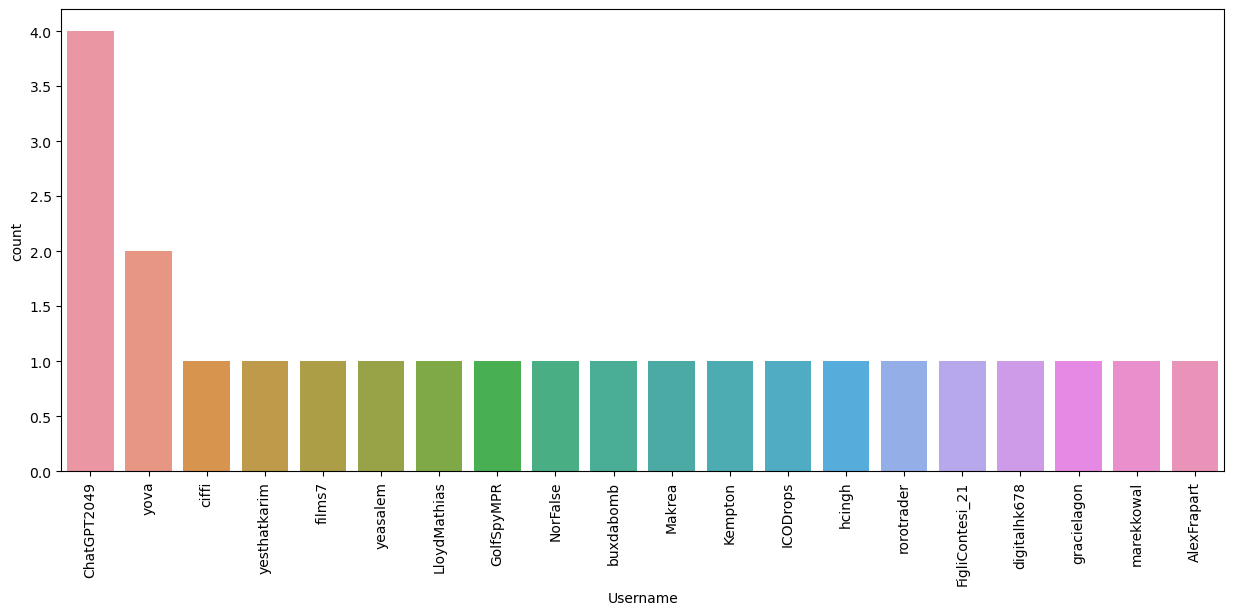

In [77]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Username', order=df["Username"].value_counts().index[:20])
plt.xticks(rotation=90)
plt.show()

In [83]:
df['User'].unique()

array(['https://twitter.com/ciffi', 'https://twitter.com/Why_So_Trill',
       'https://twitter.com/gregors_mac', 'https://twitter.com/yova',
       'https://twitter.com/ConnectingODots',
       'https://twitter.com/yOyO38', 'https://twitter.com/DataChaz',
       'https://twitter.com/muuficom', 'https://twitter.com/mjcavaretta',
       'https://twitter.com/Sammy_Swagner',
       'https://twitter.com/lain_bof', 'https://twitter.com/pisingh_',
       'https://twitter.com/MrCoachK15',
       'https://twitter.com/AgirlwhosNO_ONE',
       'https://twitter.com/ChatGPT2049',
       'https://twitter.com/JensHerforth',
       'https://twitter.com/AldoLema_uy', 'https://twitter.com/al91201',
       'https://twitter.com/connolly_s',
       'https://twitter.com/AadaFinance', 'https://twitter.com/artquint1',
       'https://twitter.com/ICODrops', 'https://twitter.com/TostiOk',
       'https://twitter.com/films7', 'https://twitter.com/yeasalem',
       'https://twitter.com/LloydMathias',
       'htt

In [84]:
df['User'].value_counts()

https://twitter.com/ChatGPT2049        4
https://twitter.com/yova               2
https://twitter.com/ciffi              1
https://twitter.com/yesthatkarim       1
https://twitter.com/films7             1
https://twitter.com/yeasalem           1
https://twitter.com/LloydMathias       1
https://twitter.com/GolfSpyMPR         1
https://twitter.com/NorFalse           1
https://twitter.com/buxdabomb          1
https://twitter.com/Makrea             1
https://twitter.com/Kempton            1
https://twitter.com/ICODrops           1
https://twitter.com/hcingh             1
https://twitter.com/rorotrader         1
https://twitter.com/FigliContesi_21    1
https://twitter.com/digitalhk678       1
https://twitter.com/gracielagon        1
https://twitter.com/marekkowal         1
https://twitter.com/AlexFrapart        1
https://twitter.com/TostiOk            1
https://twitter.com/artquint1          1
https://twitter.com/Why_So_Trill       1
https://twitter.com/AadaFinance        1
https://twitter.

In [85]:
df['ReplyCount'].unique()

array([0, 1, 4, 2, 3, 6])

In [86]:
df['ReplyCount'].value_counts()

0    28
1    10
2     3
4     1
3     1
6     1
Name: ReplyCount, dtype: int64

In [87]:
df['RetweetCount'].unique()

array([ 0,  4,  3, 12,  2,  1])

In [88]:
df['RetweetCount'].value_counts()

0     33
3      4
12     2
2      2
1      2
4      1
Name: RetweetCount, dtype: int64

In [89]:
df['LikeCount'].unique()

array([ 4,  2,  0, 41, 19, 57,  1,  7,  9, 23, 11, 50, 21,  5,  3,  6])

In [90]:
df['LikeCount'].value_counts()

0     16
1      9
3      3
4      2
2      2
9      2
41     1
19     1
57     1
7      1
23     1
11     1
50     1
21     1
5      1
6      1
Name: LikeCount, dtype: int64

In [91]:
df['QuoteCount'].unique()

array([0, 2, 1])

In [92]:
df['QuoteCount'].value_counts()

0    41
2     2
1     1
Name: QuoteCount, dtype: int64

In [93]:
df['Language'].unique()

array(['de', 'en', 'fr', 'es', 'it', 'zh'], dtype=object)

In [94]:
df['Language'].value_counts()

en    33
de     3
fr     3
es     3
it     1
zh     1
Name: Language, dtype: int64

In [95]:
df['Source'].unique()

array(['<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
       '<a href="https://ifttt.com" rel="nofollow">IFTTT</a>',
       '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
       '<a href="https://twitter.com" rel="nofollow">TweetDeck Web App</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [96]:
df['Source'].value_counts()

<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>                 19
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>     9
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>       6
<a href="https://ifttt.com" rel="nofollow">IFTTT</a>                                     6
<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>        2
<a href="https://twitter.com" rel="nofollow">TweetDeck Web App</a>                       1
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      1
Name: Source, dtype: int64

In [98]:
df['hastag_counts'].unique()

array([ 1,  0,  4,  2,  5, 10,  3,  7, 15,  6])

In [99]:
df['hastag_counts'].value_counts()

0     20
1      9
2      4
5      4
4      2
10     1
3      1
7      1
15     1
6      1
Name: hastag_counts, dtype: int64

In [102]:
pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 2.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [100]:
pip install wordcloud


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 kB 1.7 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.9.1.1-cp39-cp39-macosx_11_0_arm64.whl size=153083 sha256=1ac554653eedd4c21113d5a6f3d0d4755a55e2f68ab42daa2e19e14ec4de84c4
  Stored in directory: /Users/student/Library/Caches/pip/wheels/97/4a/4e/ebf8252ba08b46a4d8e4eb21c5594f14dacd808ec1fc4b6eb5
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


In [103]:
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

In [104]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show() 

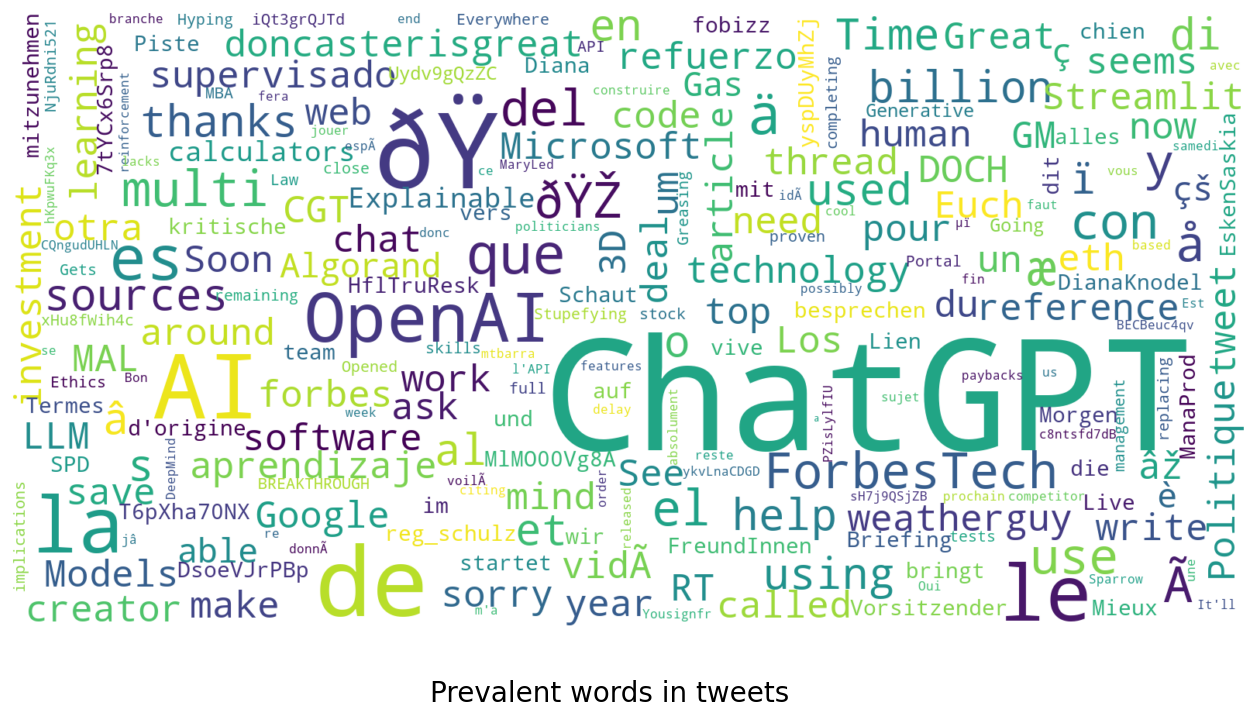

In [105]:
show_wordcloud(df['Text'], title = 'Prevalent words in tweets')

sentimental analysis

In [79]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [80]:
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    try:
        if sia.polarity_scores(post)["compound"] > 0:
            return "Positive"
        elif sia.polarity_scores(post)["compound"] < 0:
            return "Negative"
        else:
            return "Neutral"  
    except:
        return "Neutral"

In [81]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    
    colors = ["green", "red", "blue"]
    counts.plot(kind='bar', ax=ax1, color=colors)
    percent.plot(kind='bar', ax=ax2, color=colors)
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

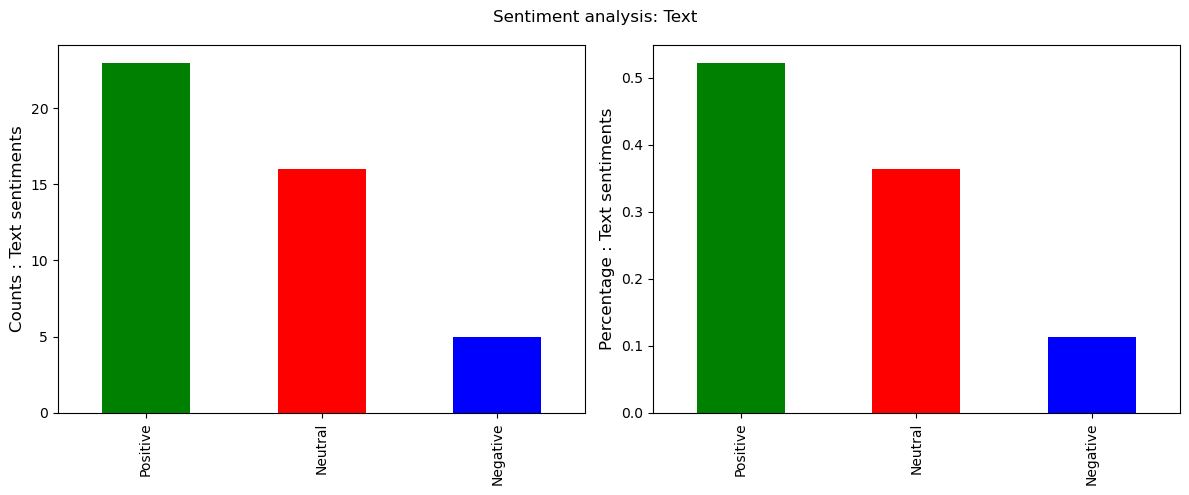

In [82]:
df['text_sentiment'] = df['Text'].apply(lambda x: find_sentiment(x))
plot_sentiment(df, 'text_sentiment', 'Text')

In [47]:

columns_to_drop = ['MentionedUsers']  
df = df.drop(columns=columns_to_drop)



In [48]:

df = df.dropna()  


df = df.drop_duplicates()

In [49]:
X = df['Text']
y = df['Username']


In [50]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [51]:

from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer()


X_train_vectorized = vectorizer.fit_transform(X_train)

X_test_vectorized = vectorizer.transform(X_test)


In [21]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split


data = pd.read_csv('chatgpt1.csv')  

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)


X_train = train_data['Text']  
y_train = train_data['Language']  

X_test = test_data['Text']  
y_test = test_data['Language']  


vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Print the shape of the vectorized data
print("Vectorized training set shape:", X_train_vectorized.shape)
print("Vectorized testing set shape:", X_test_vectorized.shape)


Vectorized training set shape: (40000, 113153)
Vectorized testing set shape: (10001, 113153)


In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the classification model (e.g., KNN or Random Forest)
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_vectorized, y_train)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_vectorized, y_train)

# Predict the user IDs for the test set
y_pred_knn = knn.predict(X_test_vectorized)
y_pred_rf = rf.predict(X_test_vectorized)

# Evaluate the accuracy of the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print('Accuracy of KNN:', accuracy_knn)
print('Accuracy of Random Forest:', accuracy_rf)

Accuracy of KNN: 0.0
Accuracy of Random Forest: 0.0


sentimental analysis

In [65]:
from sklearn.naive_bayes import MultinomialNB

In [107]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_combined, y_train)

# Make predictions on the testing set
y_pred = nb_classifier.predict(X_test_combined)

# Evaluate the predictions
classification_report = classification_report(y_test, y_pred)

# Print the classification report
print(classification_report)

NameError: name 'X_train_combined' is not defined

In [60]:
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1'


In [62]:
#Clusterring
from sklearn.cluster import KMeans
# Perform K-Means clustering
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_train_vectorized)

# Get the cluster labels for the tweets
cluster_labels = kmeans.labels_

# Add the cluster labels to the DataFrame
data['Cluster'] = cluster_labels

# Print the number of tweets in each cluster
cluster_counts = data['Cluster'].value_counts()
print(cluster_counts)

# Print the top 5 tweets from each cluster
for cluster in range(k):
    print(f"\nCluster {cluster}:")
    tweets_in_cluster = data[data['Cluster'] == cluster]['Text']
    top_tweets = tweets_in_cluster.head(5)
    print(top_tweets)




AttributeError: 'NoneType' object has no attribute 'split'

engagement prediction

In [63]:
# Concatenate the text features with other numerical features
X_train_combined = pd.concat([pd.DataFrame(X_train_text.toarray()), X_train.drop('Text', axis=1)], axis=1)
X_test_combined = pd.concat([pd.DataFrame(X_test_text.toarray()), X_test.drop('Text', axis=1)], axis=1)

# Train the Random Forest regressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train_combined, y_train)

# Make predictions on the testing set
y_pred = rf_regressor.predict(X_test_combined)

# Evaluate the predictions
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print evaluation metrics
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

NameError: name 'X_train_text' is not defined

hashtag analysis

In [109]:
import re

# Extract hashtags from the tweet text using regular expressions
df['hashtags'] = df['Text'].apply(lambda x: re.findall(r'#(\w+)', x))


In [110]:
from collections import Counter

# Count the frequency of each hashtag
hashtag_counter = Counter([tag for tags in df['hashtags'] for tag in tags])


In [111]:
import numpy as np

# Create a matrix to represent the co-occurrence of hashtags
co_occurrence_matrix = np.zeros((len(hashtag_counter), len(hashtag_counter)), dtype=int)

# Update the co-occurrence matrix based on the hashtags in each tweet
for tags in df['hashtags']:
    for i in range(len(tags)):
        for j in range(i + 1, len(tags)):
            co_occurrence_matrix[tags[i], tags[j]] += 1
            co_occurrence_matrix[tags[j], tags[i]] += 1


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [112]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(co_occurrence_matrix)

# Apply Naive Bayes classification
nb = MultinomialNB()
nb.fit(co_occurrence_matrix, labels)

/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'